# My DH Project
Author: Tingyue Cui

Course: DH 100

Instructor: Professor Adam Anderson


Description of the study Research Questions


1. What can a person do to reduce their chance of getting a heart attack?
2. What factors contribute to the heart attack?
3. Which factor, among these variables, contributes to a heart attack the most?
4. Are heart attacks more likely to be caused by external or internal factors?


Analysis 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# Import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio


In [ ]:
# Load R
%load_ext rpy2.ipython

In [ ]:
#Dataset explore
%%R
heart = read.csv("heart.csv")
heart$age
summary(heart$age) 
# Average age 54.37 min 29 max 77

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   47.50   55.00   54.37   61.00   77.00 


In [ ]:
#read dataset using pandas
data=pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# About This Dataset:

Age : Age of the patient

Sex : Sex of the patient ( 1 = Male; 0 = Female)

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholesteral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 

0= less chance of heart attack

1= more chance of heart attack

In [ ]:
# Explore gender and low/high chance of heart attack
GD = px.pie(data, names='sex',title="Gender Distribution")
GD # 0:Female 1:Male



In [ ]:
Chance = px.pie(data, names='output', title="Chance of Heart Attach")
Chance# 0:Low chance 1:High chance

Text(0, 0.5, 'Count')

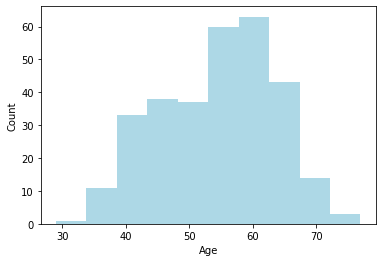

In [ ]:
#Explore Age Distribution
plt.hist(data['age'], color='lightblue')
plt.xlabel('Age')
plt.ylabel('Count')

In [ ]:
# Gender and Heart Attack Chance 
genderchance= px.histogram(data, x= "sex", color='output', title ="Gender&Heart Attack Chance")
genderchance

In [ ]:
# Resting Blood Pressure vs Age vs Chance of Heart Attack
px.scatter(data, x="age", y="trtbps", color="output", title="Resting Blood Pressure, Age, Chance of Heart Attack") #output 1= High Chance output 0= Low Chance


In [ ]:
# Mean resting blood pressure for High Chance
np.mean(data.trtbps[:165])

In [ ]:
# Mean resting blood pressure for Low Chance
np.mean(data.trtbps[166:303])

In [ ]:
# Chol level vs Age Vs Chance of Heart Attack
px.scatter(data, x="age", y="chol", color="output", title="Cholesterol level, Age, Chance of Heart Attack") #output 1= High Chance output 0= Low Chance

#Maybe do a hypothesis testing to check there is no significant difference between high chance and low chance's cholesterol level


In [ ]:
#Mean chol for high chance people (Higher than normal 200mg/dL)
np.mean(data.chol[:165])

242.23030303030302

In [ ]:
#Mean chol for low chance people (Higher than normal 200mg/dL)
np.mean(data.chol[166:303])

250.83211678832117

In [ ]:
# Chest Pain type analysis

px.pie(data, names="cp", title= "Chest Pain Type")

In [ ]:
# Maximum Heart Rate Achieved


In [ ]:
# Exercise Induced Angina


In [ ]:
# Fasting Blood Pressure


In [ ]:
# Number of Major Vessels

In [ ]:
# resting electrocardiographic results and chance of heart attack and chest pain (just for testing only)
px.scatter(data, x="restecg", y="cp", color="output")

In [ ]:

%%R
install.packages("ggcorrplot")
install.packages("reshape2")
install.packages("ggplot2")
library(ggplot2)
library(ggcorrplot)
library(reshape2)


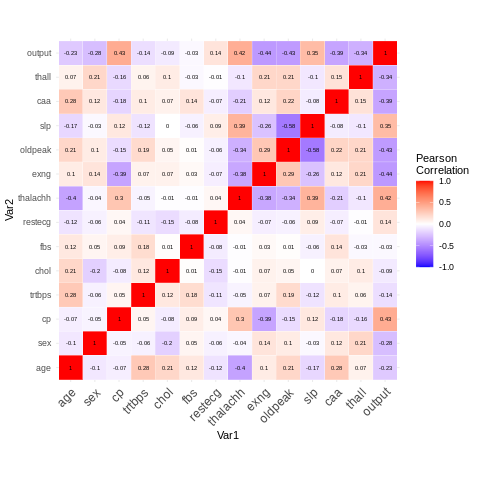

In [ ]:
#Part of this code is refered to
#http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization
# Correlation Heatmap for each variable
%%R
corr <- round(cor(heart), 2)

melted_corr <- melt(corr)
head(melted_corr)

ggplot(data = melted_corr, aes(x=Var1, y=Var2, fill=value))+ 
  geom_tile(color = "white")+ 
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1,1), space = "Lab", name="Pearson\nCorrelation") + 
  theme_minimal()+ theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1))+ 
  coord_fixed()


ggheatmap = ggplot(data = melted_corr, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

ggheatmap + 
geom_text(aes(Var2, Var1, label = value), color = "black", size = 2) 
